In [3]:
from datasets import Dataset
import glob

parquet_files = glob.glob("lmsys-chat-1m/data/*.parquet")
dataset = Dataset.from_parquet(parquet_files)
df = dataset.to_pandas()

print(df.head())

                    conversation_id       model  \
0  c20948192699451b8f99586686d3be12  vicuna-13b   
1  8b02aa2df44847a1b1608027e2f402cd  vicuna-33b   
2  c18f3612fac140cb9d89912901d2dbe4  vicuna-13b   
3  d1fabb62e3364665a06c8054c406cd87   llama-13b   
4  b2da335248f04e439bc2aecbce3031e7   koala-13b   

                                        conversation  turn    language  \
0  [{'content': 'Given the article below, you hav...     1     English   
1  [{'content': 'Alright, let's dive into this te...     2     English   
2  [{'content': 'あなたが最終更新されたのはいつですか', 'role': 'us...     5    Japanese   
3  [{'content': 'You are an AI assistant that hel...     1     English   
4  [{'content': 'Reescreva esse texto de modo mai...     1  Portuguese   

                                   openai_moderation  redacted  
0  [{'categories': {'harassment': False, 'harassm...      True  
1  [{'categories': {'harassment': False, 'harassm...      True  
2  [{'categories': {'harassment': False, 'harassm... 

In [4]:
print(df.columns.tolist())
print(df.head(2))
print(df.shape)
print(df.iloc[0]['conversation'])  # 显示第一行

['conversation_id', 'model', 'conversation', 'turn', 'language', 'openai_moderation', 'redacted']
                    conversation_id       model  \
0  c20948192699451b8f99586686d3be12  vicuna-13b   
1  8b02aa2df44847a1b1608027e2f402cd  vicuna-33b   

                                        conversation  turn language  \
0  [{'content': 'Given the article below, you hav...     1  English   
1  [{'content': 'Alright, let's dive into this te...     2  English   

                                   openai_moderation  redacted  
0  [{'categories': {'harassment': False, 'harassm...      True  
1  [{'categories': {'harassment': False, 'harassm...      True  
(1000000, 7)
[{'content': 'Given the article below, you have to determine if "Yes" or "No", the summary is factually consistent with news article.\n\nIs the summary factually consistent with the article? (Yes/No)\nStart with Yes or No. If you say No, explain which sentence is inconsistent and why.\n\nSummary:\n1. NAME_1 informs everyone 

In [5]:
import json
import pandas as pd
from transformers import AutoTokenizer

df_with_len_one_turn = df.copy()
df_with_len_one_turn = df_with_len_one_turn[df_with_len_one_turn['turn'] == 1]

def extract_lengths(conversation):
    try:
        messages = conversation
        if len(messages) != 2:
            raise Exception("len(messages) != 2")
        if len(messages) == 2:
            if messages[0]['role'] != 'user':
                raise Exception("messages[0]['role'] != 'user'")
            if messages[1]['role'] != 'assistant':
                raise Exception("messages[1]['role'] != 'assistant'")
            user_input = messages[0]['content']
            len_user_input = len(user_input)
            num_input_tokens =  len(tokenizer.encode(user_input, add_special_tokens=True))

            assistant_output = messages[1]['content']
            len_assistant_output = len(assistant_output)
            num_output_tokens = len(tokenizer.encode(assistant_output, add_special_tokens=True))
            # print(user_input, assistant_output)
            # print(len_user_input, len_assistant_output, num_input_tokens, num_output_tokens)
            return len_user_input, len_assistant_output, num_input_tokens, num_output_tokens
        else:
            return None, None
    except Exception as e:
        raise e

print('load tokenizer')
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
df_with_len_one_turn[['input_len', 'output_len', 'num_input_tokens', "num_output_tokens"]] = df_with_len_one_turn['conversation'].apply(
    lambda x: pd.Series(extract_lengths(x))
)

df_with_len_one_turn.head()

load tokenizer


Token indices sequence length is longer than the specified maximum sequence length for this model (552 > 512). Running this sequence through the model will result in indexing errors


KeyboardInterrupt: 

In [1]:
print(df_with_len_one_turn.describe())

NameError: name 'df_with_len_one_turn' is not defined

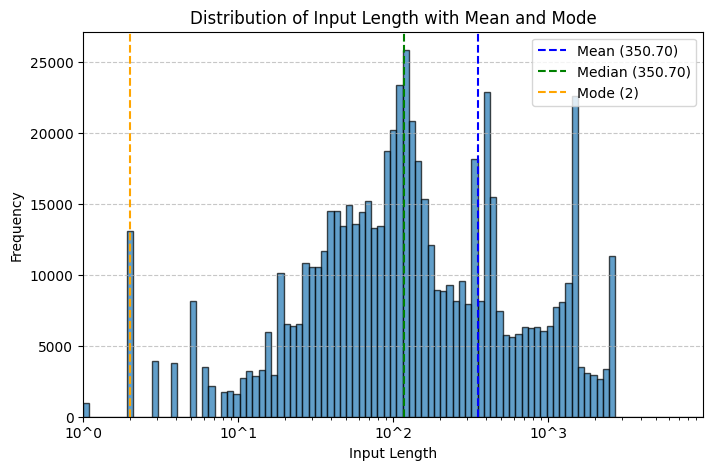

In [36]:
#输入
import matplotlib.pyplot as plt
import numpy as np
mean_value = df_with_len_one_turn['input_len'].mean()
median_value = df_with_len_one_turn['input_len'].median()
mode_value = df_with_len_one_turn['input_len'].mode()[0]  # 可能有多个众数，取第一个

plt.figure(figsize=(8, 5))
plt.hist(df_with_len_one_turn['input_len'], bins=np.logspace(0, 4, num=100), edgecolor='black', alpha=0.7)
plt.xscale('log')
plt.xticks([10**i for i in range(4)], [f'10^{i}' for i in range(4)])  # 设置显示的刻度和标签
plt.xlim(1, 10**4)
plt.axvline(mean_value, color='blue', linestyle='--', linewidth=1.5, label=f'Mean ({mean_value:.2f})')
plt.axvline(median_value, color='green', linestyle='--', linewidth=1.5, label=f'Median ({mean_value:.2f})')
plt.axvline(mode_value, color='orange', linestyle='--', linewidth=1.5, label=f'Mode ({mode_value})')
plt.xlabel('Input Length')
plt.ylabel('Frequency')
plt.title('Distribution of Input Length with Mean and Mode')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


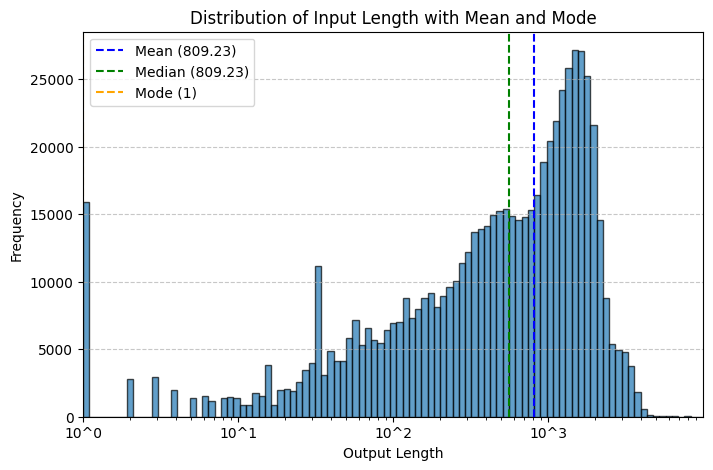

In [40]:
#输出
import matplotlib.pyplot as plt
import numpy as np
mean_value = df_with_len_one_turn['output_len'].mean()
median_value = df_with_len_one_turn['output_len'].median()
mode_value = df_with_len_one_turn['output_len'].mode()[0]

plt.figure(figsize=(8, 5))
plt.hist(df_with_len_one_turn['output_len'], bins=np.logspace(0, 4, num=100), edgecolor='black', alpha=0.7)
plt.xscale('log')
plt.xticks([10**i for i in range(4)], [f'10^{i}' for i in range(4)])  # 设置显示的刻度和标签
plt.xlim(1, 10**4)
plt.axvline(mean_value, color='blue', linestyle='--', linewidth=1.5, label=f'Mean ({mean_value:.2f})')
plt.axvline(median_value, color='green', linestyle='--', linewidth=1.5, label=f'Median ({mean_value:.2f})')
plt.axvline(mode_value, color='orange', linestyle='--', linewidth=1.5, label=f'Mode ({mode_value})')
plt.xlabel('Output Length')
plt.ylabel('Frequency')
plt.title('Distribution of Input Length with Mean and Mode')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()